In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score

## Iris dataset

In [180]:
df = pd.read_csv("iris.csv",usecols=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm","Species"])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [181]:
df.shape

(150, 5)

In [182]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


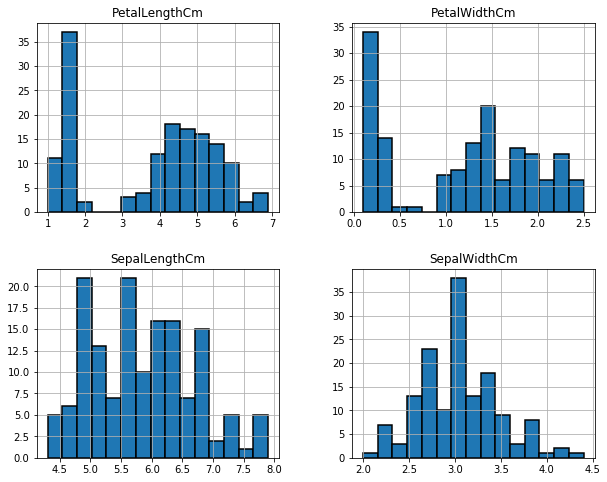

In [184]:
df.hist(bins=15, edgecolor='black', linewidth=1.5, figsize=(10,8))
plt.show()

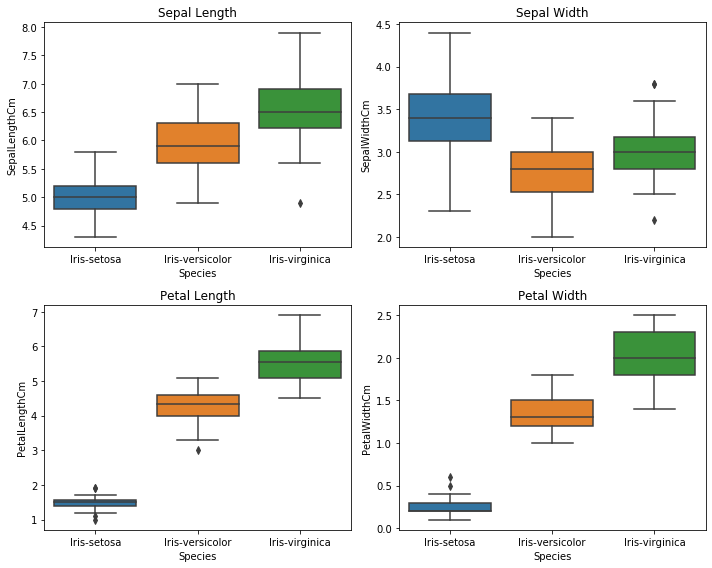

In [185]:
plt.figure(figsize=(10, 8))
plt.subplot(2,2,1)
plt.title("Sepal Length")
sns.boxplot(y="SepalLengthCm", x="Species", data=df)
plt.subplot(2,2,2)
plt.title("Sepal Width")
sns.boxplot(y="SepalWidthCm", x="Species", data=df)
plt.subplot(2,2,3)
plt.title("Petal Length")
sns.boxplot(y="PetalLengthCm", x="Species", data=df)
plt.subplot(2,2,4)
plt.title("Petal Width")
sns.boxplot(y="PetalWidthCm", x="Species", data=df)
plt.tight_layout()
plt.show()

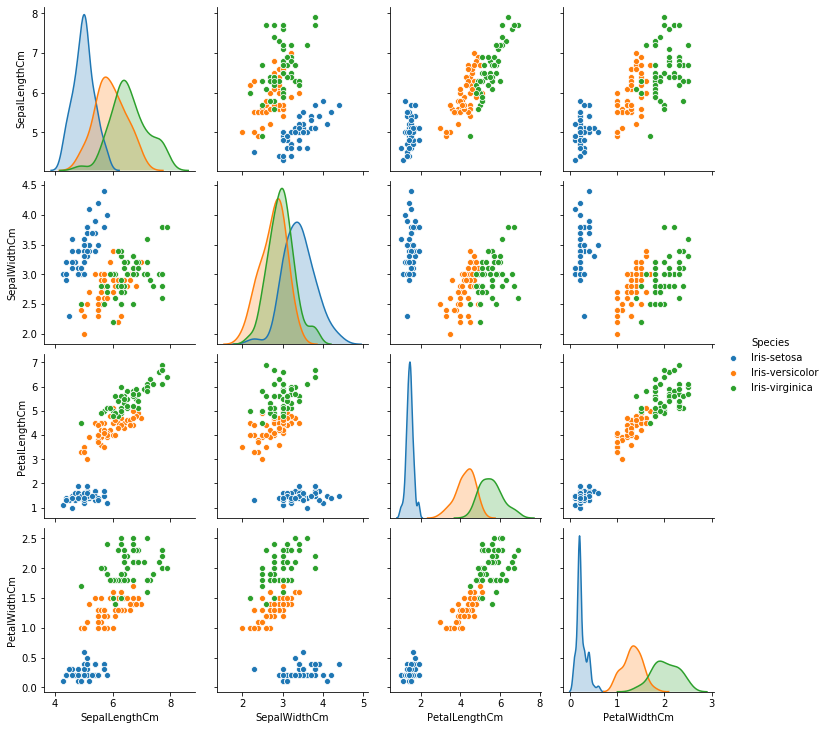

In [186]:
sns.pairplot(data = df, hue = "Species");

In [187]:
df = pd.get_dummies(df, columns = ['Species'])

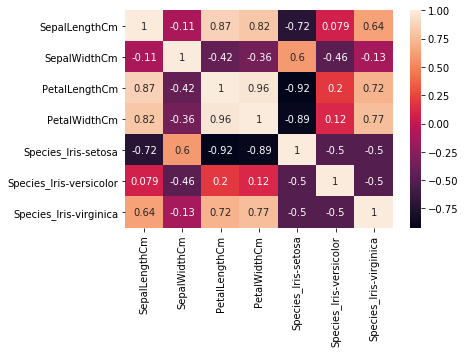

In [188]:
cor=df.corr()
sns.heatmap(cor,annot=True)

In [189]:
X= df.drop(['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica'], axis=1)
y = df[['Species_Iris-setosa','Species_Iris-versicolor','Species_Iris-virginica']]

In [190]:
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
# y_train_iris = encoder.fit_transform(y_train_iris.values.reshape(-1, 1))
# y_test_iris = encoder.transform(y_test_iris.values.reshape(-1, 1))

## Bank Authentication 

In [14]:
df2 = pd.read_csv('BankNote_Authentication.csv')
df2.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [15]:
df2.shape

(1372, 5)

In [16]:
df2.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [18]:
df2.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [19]:
df2['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

Plot of Class Count :: 



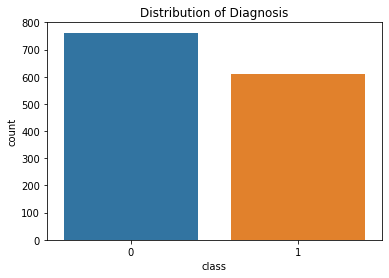

In [20]:
print("Plot of Class Count :: \n")

sns.countplot(x='class',data = df2)
plt.title("Distribution of Diagnosis")
plt.show()



Distribution Plots



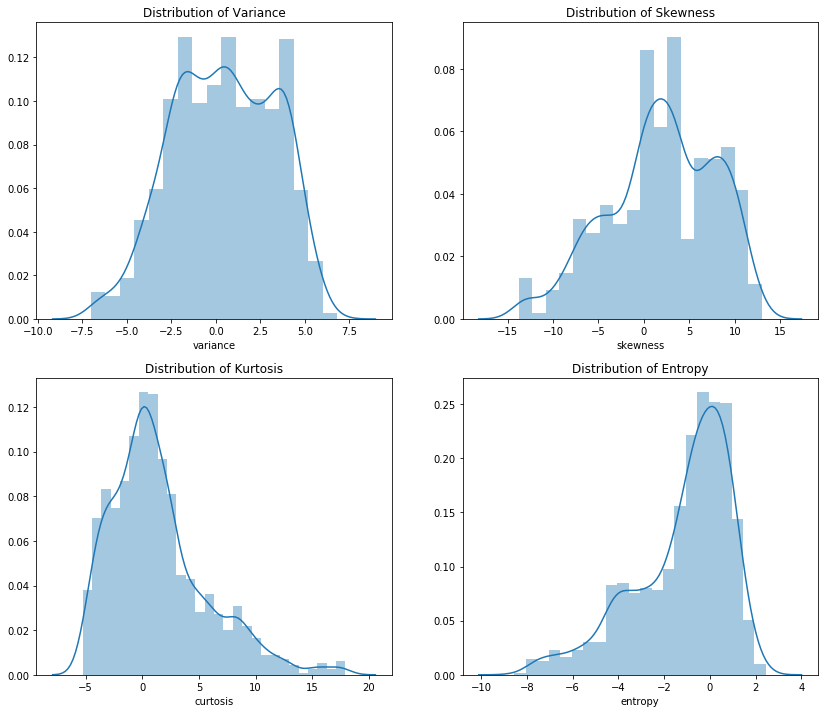

In [21]:
print("\n\nDistribution Plots\n")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(14, 12))

sns.distplot(df2['variance'], ax=ax[0,0])
ax[0,0].title.set_text("Distribution of Variance")
sns.distplot(df2['skewness'], ax=ax[0,1])
ax[0,1].title.set_text("Distribution of Skewness")
sns.distplot(df2['curtosis'], ax=ax[1,0])
ax[1,0].title.set_text("Distribution of Kurtosis")
sns.distplot(df2['entropy'], ax=ax[1,1])
ax[1,1].title.set_text("Distribution of Entropy")
plt.show()



Distribution plot using classwise data



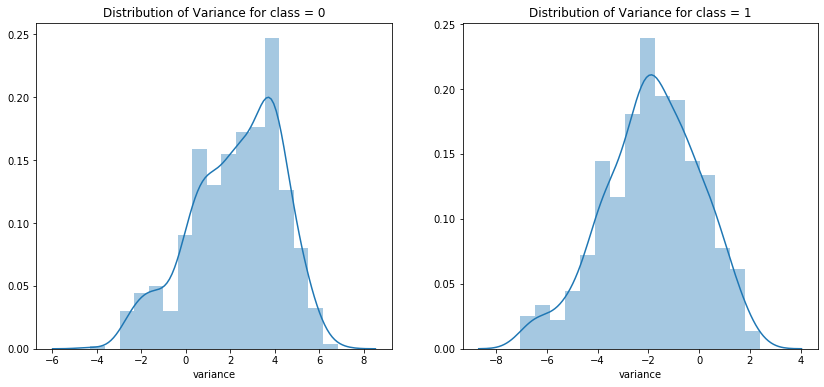

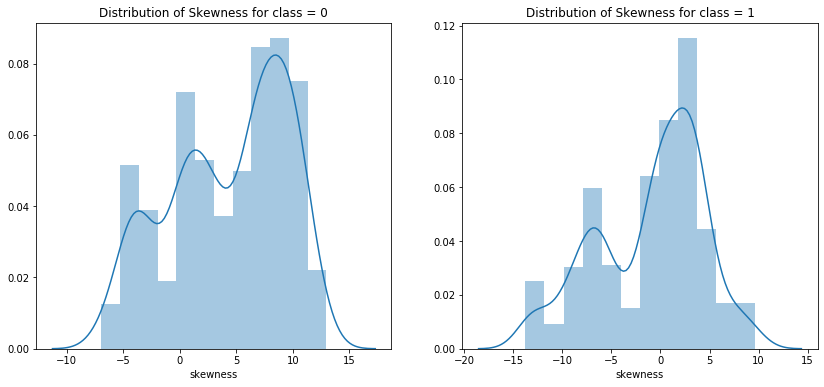

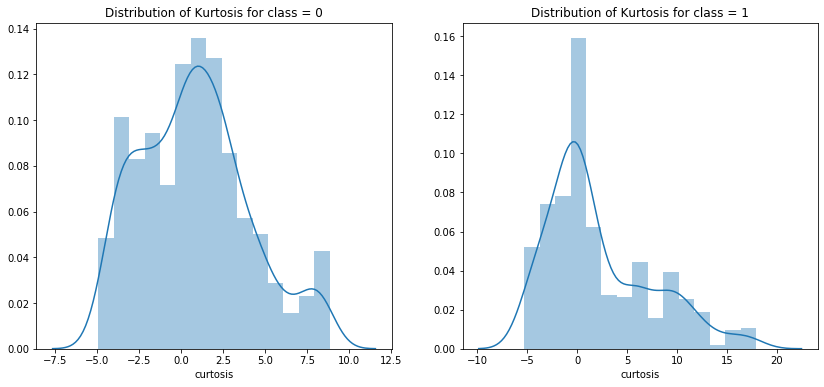

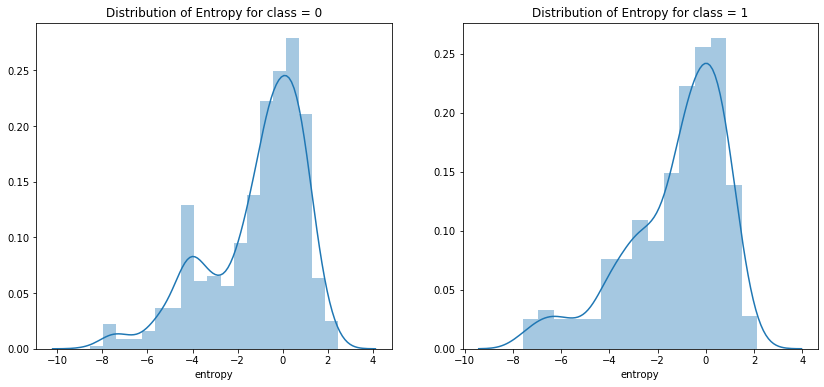

In [22]:
print("\n\nDistribution plot using classwise data\n")
# Splitting original dataset classwise
dataset_class_0 = df2[df2["class"] == 0]
dataset_class_1 = df2[df2["class"] == 1]

fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))
sns.distplot(dataset_class_0['variance'], ax=ax[0])
ax[0].title.set_text("Distribution of Variance for class = 0")
sns.distplot(dataset_class_1['variance'], ax=ax[1])
ax[1].title.set_text("Distribution of Variance for class = 1")
plt.show()

fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))
sns.distplot(dataset_class_0['skewness'], ax=ax[0])
ax[0].title.set_text("Distribution of Skewness for class = 0")
sns.distplot(dataset_class_1['skewness'], ax=ax[1])
ax[1].title.set_text("Distribution of Skewness for class = 1")
plt.show()

fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))
sns.distplot(dataset_class_0['curtosis'], ax=ax[0])
ax[0].title.set_text("Distribution of Kurtosis for class = 0")
sns.distplot(dataset_class_1['curtosis'], ax=ax[1])
ax[1].title.set_text("Distribution of Kurtosis for class = 1")
plt.show()

fig, ax = plt.subplots(ncols = 2, figsize=(14, 6))
sns.distplot(dataset_class_0['entropy'], ax=ax[0])
ax[0].title.set_text("Distribution of Entropy for class = 0")
sns.distplot(dataset_class_1['entropy'], ax=ax[1])
ax[1].title.set_text("Distribution of Entropy for class = 1")
plt.show()



Pairplot for better understanding :: 



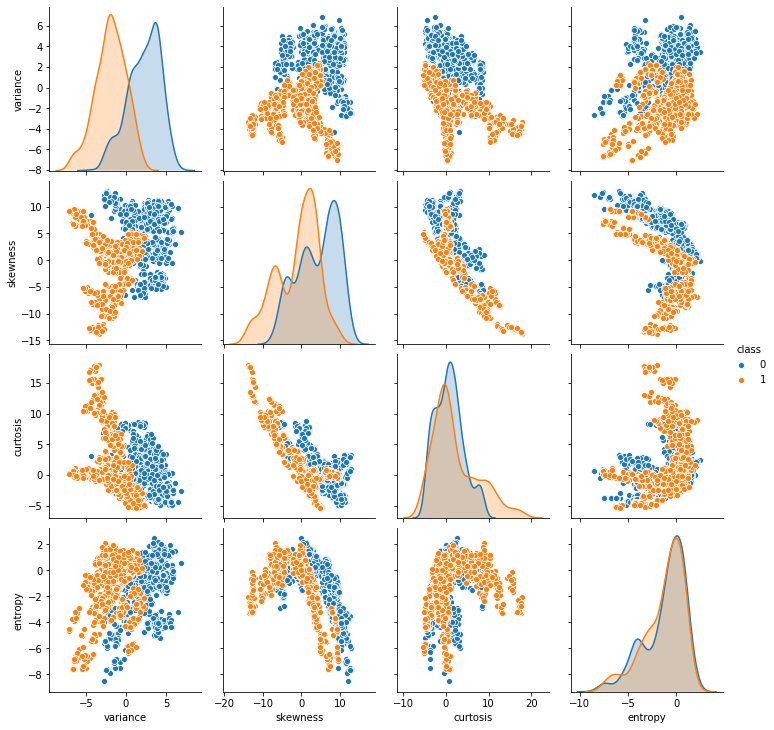

In [23]:
print("\n\nPairplot for better understanding :: \n")
sns.pairplot(data=df2,hue='class')
plt.show()



Box plots :: 



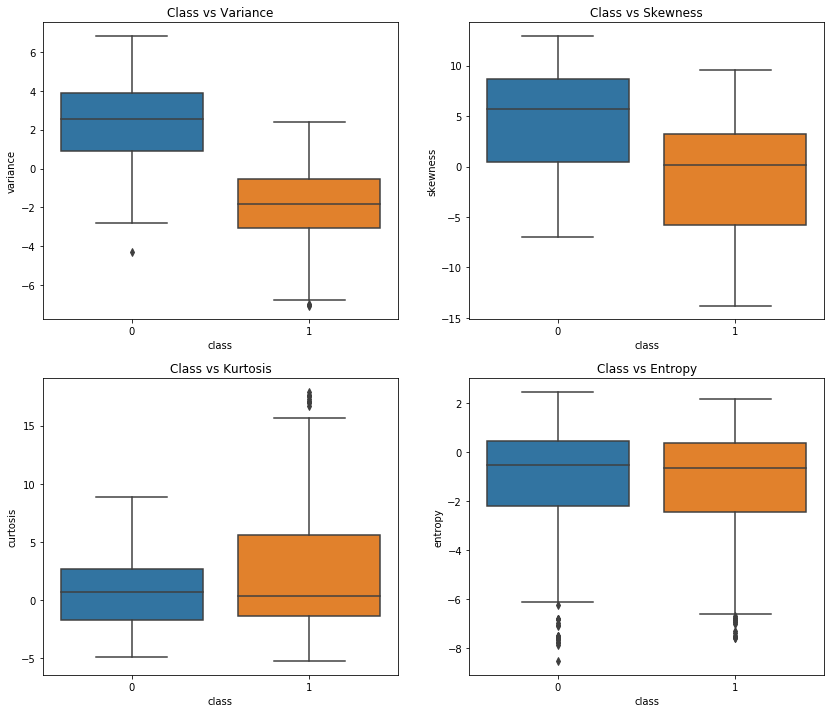

In [24]:
print("\n\nBox plots :: \n")
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(14, 12))

sns.boxplot(x="class", y=df2['variance'],data=df2,ax=ax[0,0])
#ax[0,0].title("Class vs Variance", fontsize=20)
ax[0,0].title.set_text("Class vs Variance")

sns.boxplot(x="class", y=df2['skewness'], data=df2,ax=ax[0,1])
ax[0,1].title.set_text("Class vs Skewness")


sns.boxplot(x="class", y=df2['curtosis'], data=df2,ax=ax[1,0])
ax[1,0].title.set_text("Class vs Kurtosis")

sns.boxplot(x="class", y=df2['entropy'], data=df2,ax=ax[1,1])
ax[1,1].title.set_text("Class vs Entropy")
plt.show()




Correlation plot :: 


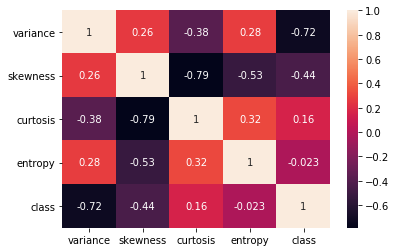

In [25]:
print("\n\nCorrelation plot :: ")
corr = df2.corr()
sns.heatmap(corr,annot=True)

In [26]:
X=df2.drop(['class'], axis=1)
y=df2['class']

In [27]:
X_train_bank, X_test_bank, y_train_bank, y_test_bank = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
X_train_bank.shape
y_train_bank.shape

(1097,)

## Cancer Dataset

In [29]:
df3 = pd.read_csv('cancer_data.csv')
df3=df3.drop(['id','Unnamed: 32'], axis=1)
df3.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [30]:
label_encoder = LabelEncoder()
df3['diagnosis']= label_encoder.fit_transform(df3['diagnosis'])

In [31]:
df3.shape

(569, 31)

In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int32  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [33]:
df3.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

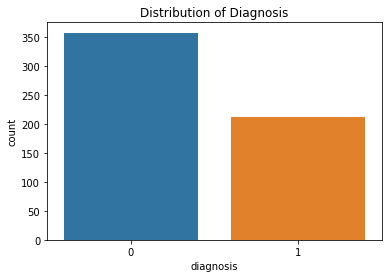

In [34]:
sns.countplot(x='diagnosis',data = df3)
plt.title("Distribution of Diagnosis")
plt.show()

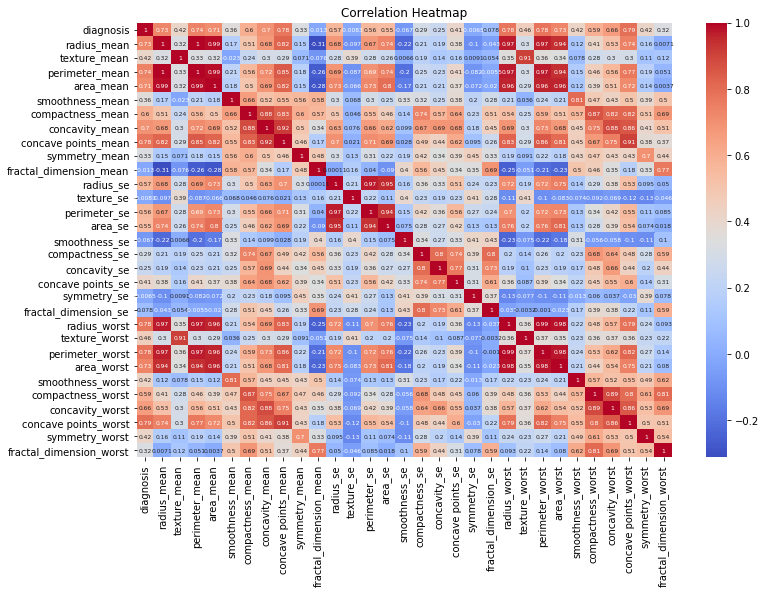

In [35]:
plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', annot_kws={'fontsize': 6})
plt.title('Correlation Heatmap')
plt.show()

In [36]:
X=df3.drop(['diagnosis'], axis=1)
y=df3['diagnosis']

In [37]:
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X, y, test_size=0.2, random_state=42)

## MNIST Digit dataset

In [38]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [39]:

# Reshape the data to have the correct number of features (784)
X_train_flattened = X_train.reshape(X_train.shape[0], -1)
X_test_flattened = X_test.reshape(X_test.shape[0], -1)


In [40]:

# Convert the target labels to one-hot encoded format for multi-class classification
y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

## ANN Function

In [191]:
def get_best_activation_function(dependent_data, independent_data_train,independent_data_test):
    activation_functions = ['relu', 'tanh', 'sigmoid']
    max_variance = 0
    best_activation_function = 'relu'
    output_dim=len(set(dependent_data))
    
    for activation_func in activation_functions:
        model = Sequential()
        model.add(Dense(units=20, activation=activation_func, input_dim =independent_data_train.shape[1]))
        model.add(Dense(10, activation=activation_func))  # Input layer with 10 neurons and ReLU activation
        #model.add(Dense(output_dim, activation='softmax')) 
        if output_dim <= 2:
        # Binary classification problem
            
            model.add(Dense(units=1, activation='sigmoid'))
        #model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        else:
        # Multi-class classification problem
        
            model.add(Dense(units=output_dim, activation='softmax'))
        #model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        hidden_layer_output = model.predict(independent_data_test)
        variance = np.var(hidden_layer_output)
        
        if variance > max_variance:
            max_variance = variance
            best_activation_function = activation_func
            
    
    return best_activation_function

In [192]:
def construct_neural_network(dependent_data, independent_data_train, independent_data_test):
    # Determine the number of input features (columns) in the dataset
    input_dim = independent_data_train.shape[1]
    # Determine the number of output classes for the dataset
    output_dim = len(set(dependent_data))

    # Get the best activation function for the dataset
    best_activation_function = get_best_activation_function(dependent_data, independent_data_train,independent_data_test)

    # Create a sequential model
    model = Sequential()

    # Add the input layer and the hidden layer with the best activation function
    model.add(Dense(units=20, activation=best_activation_function, input_dim =independent_data_train.shape[1]))
    model.add(Dense(units=10, activation=best_activation_function))

    # Add the output layer

    # Determine the optimizer and loss function based on the nature of the dataset
    if output_dim == 2:
        # Binary classification problem
            
        model.add(Dense(units=1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    else:
        # Multi-class classification problem
        
        model.add(Dense(units=output_dim, activation='softmax'))
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Return the constructed model
    return model

In [193]:
model1 = construct_neural_network(y_train_iris,X_train_iris,X_test_iris)

In [213]:
modeli=construct_neural_network(y_train_onehot,X_train_scaled,X_test_scaled)

TypeError: unhashable type: 'numpy.ndarray'

In [194]:
history1=model1.fit(X_train_iris,y_train_iris,epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
4/4 [==============================] - 0s 44ms/step - loss: 1.8490 - accuracy: 0.3333 - val_loss: 1.4907 - val_accuracy: 0.4167
Epoch 2/10
4/4 [==============================] - 0s 8ms/step - loss: 1.6985 - accuracy: 0.3333 - val_loss: 1.3843 - val_accuracy: 0.4167
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 1.5690 - accuracy: 0.3333 - val_loss: 1.2856 - val_accuracy: 0.4167
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 1.4388 - accuracy: 0.3333 - val_loss: 1.1981 - val_accuracy: 0.4167
Epoch 5/10
4/4 [==============================] - 0s 9ms/step - loss: 1.3305 - accuracy: 0.3333 - val_loss: 1.1206 - val_accuracy: 0.4167
Epoch 6/10
4/4 [==============================] - 0s 8ms/step - loss: 1.2256 - accuracy: 0.3333 - val_loss: 1.0589 - val_accuracy: 0.4167
Epoch 7/10
4/4 [==============================] - 0s 10ms/step - loss: 1.1480 - accuracy: 0.3333 - val_loss: 1.0119 - val_accuracy: 0.4167
Epoch 8/10
4/4 [===============

In [98]:
model2 = construct_neural_network(y_train_bank,X_train_bank,X_train_bank)

In [99]:
history2=model2.fit(X_train_bank, y_train_bank,epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
31/31 [==============================] - 1s 6ms/step - loss: 0.7329 - accuracy: 0.4792 - val_loss: 0.5377 - val_accuracy: 0.7000
Epoch 2/10
31/31 [==============================] - 0s 2ms/step - loss: 0.4634 - accuracy: 0.7751 - val_loss: 0.3673 - val_accuracy: 0.8455
Epoch 3/10
31/31 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8946 - val_loss: 0.2531 - val_accuracy: 0.9182
Epoch 4/10
31/31 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9443 - val_loss: 0.1763 - val_accuracy: 0.9364
Epoch 5/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9645 - val_loss: 0.1334 - val_accuracy: 0.9636
Epoch 6/10
31/31 [==============================] - 0s 2ms/step - loss: 0.1150 - accuracy: 0.9807 - val_loss: 0.1084 - val_accuracy: 0.9636
Epoch 7/10
31/31 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9889 - val_loss: 0.0894 - val_accuracy: 0.9818
Epoch 8/10
31/31 [==

In [100]:
model3 = construct_neural_network(y_train_cancer,X_train_cancer,X_test_cancer)

In [101]:
history3=model3.fit(X_train_cancer, y_train_cancer,epochs=10, batch_size=62, validation_split=0.1)

Epoch 1/10
7/7 [==============================] - 0s 24ms/step - loss: 0.6262 - accuracy: 0.6406 - val_loss: 0.5484 - val_accuracy: 0.7174
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5861 - accuracy: 0.6577 - val_loss: 0.5354 - val_accuracy: 0.7391
Epoch 3/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5590 - accuracy: 0.6748 - val_loss: 0.5046 - val_accuracy: 0.7609
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5324 - accuracy: 0.8020 - val_loss: 0.4876 - val_accuracy: 0.8261
Epoch 5/10
7/7 [==============================] - 0s 5ms/step - loss: 0.5115 - accuracy: 0.8460 - val_loss: 0.4734 - val_accuracy: 0.8478
Epoch 6/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4922 - accuracy: 0.8460 - val_loss: 0.4619 - val_accuracy: 0.8478
Epoch 7/10
7/7 [==============================] - 0s 5ms/step - loss: 0.4724 - accuracy: 0.8411 - val_loss: 0.4433 - val_accuracy: 0.8261
Epoch 8/10
7/7 [=================

In [102]:
model4 = construct_neural_network(y_train, X_train_flattened, X_test_flattened)


In [103]:
history4=model4.fit(X_train_flattened, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 3s 2ms/step - loss: 1.2659 - accuracy: 0.6898 - val_loss: 0.6138 - val_accuracy: 0.8935
Epoch 2/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5038 - accuracy: 0.8874 - val_loss: 0.3358 - val_accuracy: 0.9222
Epoch 3/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.3437 - accuracy: 0.9121 - val_loss: 0.2520 - val_accuracy: 0.9350
Epoch 4/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.9247 - val_loss: 0.2140 - val_accuracy: 0.9418
Epoch 5/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2436 - accuracy: 0.9324 - val_loss: 0.1916 - val_accuracy: 0.9468
Epoch 6/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2192 - accuracy: 0.9390 - val_loss: 0.1763 - val_accuracy: 0.9498
Epoch 7/10
1688/1688 [==============================] - 3s 2ms/step - loss: 0.2012 - accuracy: 0.9434 - val_loss: 0.1689 - val_accuracy:

In [244]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the target labels for multi-class classification
encoder = OneHotEncoder(sparse=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

# Build the neural network model
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model

history = model.fit(X_train_scaled, y_train_onehot, epochs=1, batch_size=32, validation_split=0.1)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test_scaled, y_test_onehot)

# Predict on test data for F1-score
y_pred = model.predict(X_test_scaled)
f1_score_val = f1_score(y_test_onehot.argmax(axis=1), y_pred.argmax(axis=1), average='weighted')

# Rest of the code remains the same
# ...
X_test_scaled
y_pred

1/1 [==============================] - 0s 16ms/step - loss: 1.6364 - accuracy: 0.2667


array([[0.24133354, 0.53103137, 0.22763506],
       [0.22379458, 0.27932402, 0.49688146],
       [0.07436299, 0.89627695, 0.02936012],
       [0.27175578, 0.49094796, 0.23729615],
       [0.21656597, 0.63569   , 0.1477441 ],
       [0.20438087, 0.26956838, 0.52605075],
       [0.29184842, 0.35212135, 0.3560303 ],
       [0.21606514, 0.6912862 , 0.09264866],
       [0.12195971, 0.7225965 , 0.1554437 ],
       [0.23654051, 0.46269098, 0.3007685 ],
       [0.27030584, 0.57208645, 0.15760763],
       [0.13138933, 0.22163092, 0.6469797 ],
       [0.19782767, 0.2667118 , 0.53546053],
       [0.14291638, 0.23108965, 0.62599397],
       [0.20009658, 0.26164573, 0.53825766],
       [0.32745746, 0.43475643, 0.23778619],
       [0.20345432, 0.6777046 , 0.11884116],
       [0.1862834 , 0.49958858, 0.31412798],
       [0.24453554, 0.45631328, 0.29915118],
       [0.17963383, 0.70978445, 0.11058171],
       [0.14620516, 0.21964464, 0.6341502 ],
       [0.26612157, 0.53264016, 0.20123829],
       [0.

# Iris

1/1 [==============================] - 0s 22ms/step - loss: 0.9744 - accuracy: 0.6333


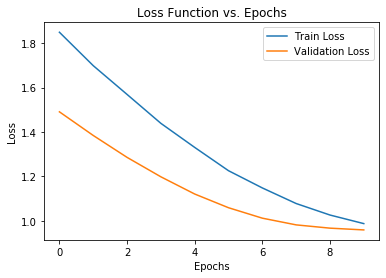

In [274]:
loss, accuracy = model1.evaluate(X_test_iris, y_test_iris)

# # # Predict on test data and get the class indices
predicted_classes = y_test_iris.idxmax(axis=1)

# Define a mapping dictionary to convert column names to numeric labels
class_mapping = {
    'Species_Iris-setosa': 0,
    'Species_Iris-versicolor': 1,
    'Species_Iris-virginica': 2
}

# Map the column names to numeric labels using the mapping dictionary
predicted_classes_numeric = predicted_classes.map(class_mapping)

f1_score_val = f1_score(predicted_classes_numeric,predicted_labels,average = "weighted")

# Generate the technical report
with open('technical_report_iris.txt', 'w') as report:
    report.write("Technical Report: Iris Dataset with 1 Hidden Layer ANN\n")
    report.write("-----------------------------------------------------\n")
    report.write("Algorithm: Artificial Neural Network (ANN) with 1 Hidden Layer\n")
    report.write("-----------------------------------------------------\n")
    report.write("Model Architecture:\n")
    model1.summary(print_fn=lambda x: report.write(x + '\n'))

    report.write("\nInitial Settings:\n")
    report.write("Sampling the parameters k0 and k1 from some distribution: Using default initialization in Keras (uniform or normal)\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nParameter Updates on Epochs:\n")
    report.write("Training the model using Adam optimizer with default settings.\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nFinal Parameter Values at the End of Training:\n")
    for layer in model1.layers:
        for weight in layer.get_weights():
            report.write(str(weight) + '\n')
    report.write("-----------------------------------------------------\n")

    report.write(f"\nTrain Loss: {history1.history['loss'][-1]:.4f}\n")
    report.write(f"Test Loss: {loss:.4f}\n")
    report.write(f"Train Accuracy: {history1.history['accuracy'][-1]:.4f}\n")
    report.write(f"Test Accuracy: {accuracy:.4f}\n")
    report.write(f"F1-Score (Weighted): {f1_score_val:.4f}\n")
    report.write("-----------------------------------------------------\n")

# Plot Loss vs. Epochs
plt.figure()
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function vs. Epochs')
plt.savefig('loss_vs_epochs_iris.png')

# Bank

9/9 [==============================] - 0s 2ms/step - loss: 0.0604 - accuracy: 1.0000


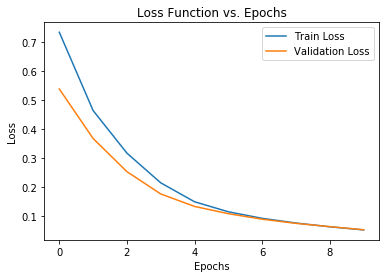

In [275]:
loss, accuracy = model2.evaluate(X_test_bank, y_test_bank)

# Predict on test data and get the class indices
y_pred_probs = model2.predict(X_test_bank)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Calculate F1-score
f1_score_val = f1_score(y_test_bank, y_pred, average='weighted')

# Generate the technical report
with open('technical_report_bank.txt', 'w') as report:
    report.write("Technical Report: Bank Dataset with 1 Hidden Layer ANN\n")
    report.write("-----------------------------------------------------\n")
    report.write("Algorithm: Artificial Neural Network (ANN) with 1 Hidden Layer\n")
    report.write("-----------------------------------------------------\n")
    report.write("Model Architecture:\n")
    model2.summary(print_fn=lambda x: report.write(x + '\n'))

    report.write("\nInitial Settings:\n")
    report.write("Sampling the parameters k0 and k1 from some distribution: Using default initialization in Keras (uniform or normal)\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nParameter Updates on Epochs:\n")
    report.write("Training the model using Adam optimizer with default settings.\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nFinal Parameter Values at the End of Training:\n")
    for layer in model2.layers:
        for weight in layer.get_weights():
            report.write(str(weight) + '\n')
    report.write("-----------------------------------------------------\n")

    report.write(f"\nTrain Loss: {history2.history['loss'][-1]:.4f}\n")
    report.write(f"Test Loss: {loss:.4f}\n")
    report.write(f"Train Accuracy: {history2.history['accuracy'][-1]:.4f}\n")
    report.write(f"Test Accuracy: {accuracy:.4f}\n")
    report.write(f"F1-Score (Weighted): {f1_score_val:.4f}\n")
    report.write("-----------------------------------------------------\n")

# Plot Loss vs. Epochs
plt.figure()
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function vs. Epochs')
plt.savefig('loss_vs_epochs_bank.png')


# Cancer

4/4 [==============================] - 0s 2ms/step - loss: 0.3846 - accuracy: 0.8772


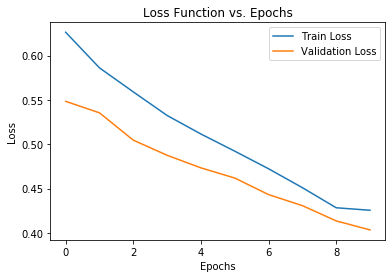

In [276]:
loss, accuracy = model3.evaluate(X_test_cancer, y_test_cancer)

# Predict on test data and get the class indices
y_pred_probs = model3.predict(X_test_cancer)
y_pred = tf.argmax(y_pred_probs, axis=1)

# Calculate F1-score
f1_score_val = f1_score(y_test_cancer, y_pred, average='weighted')

# Generate the technical report
with open('technical_report_cancer.txt', 'w') as report:
    report.write("Technical Report: Cancer Dataset with 1 Hidden Layer ANN\n")
    report.write("-----------------------------------------------------\n")
    report.write("Algorithm: Artificial Neural Network (ANN) with 1 Hidden Layer\n")
    report.write("-----------------------------------------------------\n")
    report.write("Model Architecture:\n")
    model3.summary(print_fn=lambda x: report.write(x + '\n'))

    report.write("\nInitial Settings:\n")
    report.write("Sampling the parameters k0 and k1 from some distribution: Using default initialization in Keras (uniform or normal)\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nParameter Updates on Epochs:\n")
    report.write("Training the model using Adam optimizer with default settings.\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nFinal Parameter Values at the End of Training:\n")
    for layer in model3.layers:
        for weight in layer.get_weights():
            report.write(str(weight) + '\n')
    report.write("-----------------------------------------------------\n")

    report.write(f"\nTrain Loss: {history3.history['loss'][-1]:.4f}\n")
    report.write(f"Test Loss: {loss:.4f}\n")
    report.write(f"Train Accuracy: {history3.history['accuracy'][-1]:.4f}\n")
    report.write(f"Test Accuracy: {accuracy:.4f}\n")
    report.write(f"F1-Score (Weighted): {f1_score_val:.4f}\n")
    report.write("-----------------------------------------------------\n")

# Plot Loss vs. Epochs
plt.figure()
plt.plot(history3.history['loss'], label='Train Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function vs. Epochs')
plt.savefig('loss_vs_epochs_cancer.png')


# Digit

313/313 [==============================] - 0s 686us/step - loss: 0.1886 - accuracy: 0.9448
F1 Score: 0.944742298298428


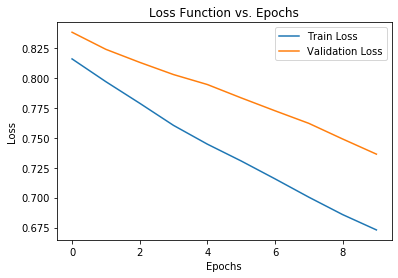

In [148]:
loss, accuracy = model4.evaluate(X_test_flattened, y_test_one_hot)

# Predict on test data and get the class indices
y_pred_probs = model4.predict(X_test_flattened)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_test_labels = np.argmax(y_test_onehot, axis=1)

# Calculate the F1 score for multi-class classification
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)

# Generate the technical report
with open('technical_report_digit.txt', 'w') as report:
    report.write("Technical Report: Digit Dataset with 1 Hidden Layer ANN\n")
    report.write("-----------------------------------------------------\n")
    report.write("Algorithm: Artificial Neural Network (ANN) with 1 Hidden Layer\n")
    report.write("-----------------------------------------------------\n")
    report.write("Model Architecture:\n")
    model4.summary(print_fn=lambda x: report.write(x + '\n'))

    report.write("\nInitial Settings:\n")
    report.write("Sampling the parameters k0 and k1 from some distribution: Using default initialization in Keras (uniform or normal)\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nParameter Updates on Epochs:\n")
    report.write("Training the model using Adam optimizer with default settings.\n")
    report.write("-----------------------------------------------------\n")

    report.write("\nFinal Parameter Values at the End of Training:\n")
    for layer in model4.layers:
        for weight in layer.get_weights():
            report.write(str(weight) + '\n')
    report.write("-----------------------------------------------------\n")

    report.write(f"\nTrain Loss: {history4.history['loss'][-1]:.4f}\n")
    report.write(f"Test Loss: {loss:.4f}\n")
    report.write(f"Train Accuracy: {history4.history['accuracy'][-1]:.4f}\n")
    report.write(f"Test Accuracy: {accuracy:.4f}\n")
    report.write(f"F1-Score (Weighted): {f1_score_val:.4f}\n")
    report.write("-----------------------------------------------------\n")

# Plot Loss vs. Epochs
plt.figure()
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Function vs. Epochs')
plt.savefig('loss_vs_epochs_digit.png')


In [144]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to a range of [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the images (convert 28x28 images to 1D array of length 784)
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Convert the target labels to one-hot encoded format
encoder = OneHotEncoder()
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test_onehot = encoder.transform(y_test.reshape(-1, 1)).toarray()

# Construct the neural network model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=784))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train_onehot, epochs=5, batch_size=32)

# Obtain the predicted output for the test data
y_pred = model.predict(X_test)

# Convert probabilities to class labels using argmax
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded target labels back to integer labels
y_test_labels = np.argmax(y_test_onehot, axis=1)

# Calculate the F1 score for multi-class classification
f1 = f1_score(y_test_labels, y_pred_labels, average='weighted')
print("F1 Score:", f1)
y_pred

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2389 - accuracy: 0.9302
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1008 - accuracy: 0.9690
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9776
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0552 - accuracy: 0.9825
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0423 - accuracy: 0.9862
F1 Score: 0.9753670761097707


array([[4.2746166e-07, 4.0404231e-07, 6.7734313e-06, ..., 9.9998307e-01,
        3.2525432e-07, 6.6386690e-07],
       [1.9907196e-11, 3.1680462e-05, 9.9996793e-01, ..., 8.0054600e-12,
        3.6487012e-07, 8.4517947e-15],
       [3.4159392e-08, 9.9974829e-01, 8.0504273e-05, ..., 7.0711394e-05,
        1.4530783e-05, 1.4060501e-07],
       ...,
       [4.1307417e-15, 5.4295751e-10, 6.6988199e-12, ..., 9.3737740e-10,
        1.2258793e-09, 5.8813980e-09],
       [1.0959042e-12, 2.1888791e-10, 9.2827547e-14, ..., 5.2833248e-11,
        4.6869536e-05, 2.7045561e-13],
       [7.2955747e-12, 7.5312690e-12, 5.2559385e-12, ..., 3.6418188e-17,
        2.8574244e-12, 5.8474748e-12]], dtype=float32)